In [11]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="darkgrid")

# Check dependencies version
pd.__version__


'0.23.4'

In [12]:
df = pd.read_csv('fortune500.csv')

In [13]:
df.columns = ['year', 'rank', 'company', 'revenue', 'profit']
df.head()


,year,rank,company,revenue,profit
0,1955,1,General Motors,9823.5,806
1,1955,2,Exxon Mobil,5661.4,584.8
2,1955,3,U.S. Steel,3250.4,195.4
3,1955,4,General Electric,2959.1,212.6
4,1955,5,Esmark,2510.8,19.1


In [14]:
non_numberic_profits = df.profit.str.contains('[^0-9.-]')

In [15]:
len(df.profit[non_numberic_profits])

369

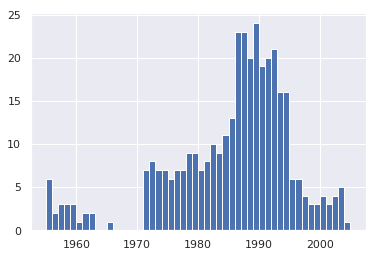

In [16]:
bin_sizes, _, _ = plt.hist(df.year[non_numberic_profits], bins=range(1955, 2006))

In [17]:
df = df.loc[~non_numberic_profits]
df.profit = df.profit.apply(pd.to_numeric)


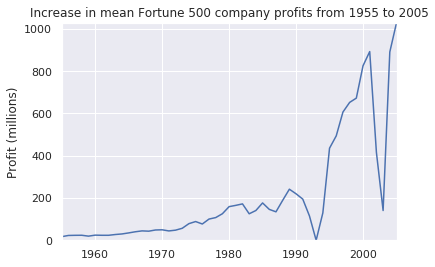

In [18]:
group_by_year = df.loc[:, ['year', 'revenue', 'profit']].groupby('year')
avgs = group_by_year.mean()
x = avgs.index
y1 = avgs.profit

def plot(x, y, ax, title, y_label):
    ax.set_title(title)
    ax.set_ylabel(y_label)
    ax.plot(x, y)
    ax.margins(x=0, y=0)
    
fig, ax = plt.subplots()
plot(x, y1, ax, 'Increase in mean Fortune 500 company profits from 1955 to 2005', 'Profit (millions)')